Titanic Dataset 

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [327]:
df=pd.read_csv('titanic_train.csv')

In [328]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Exploratory Data Analysis

In [329]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

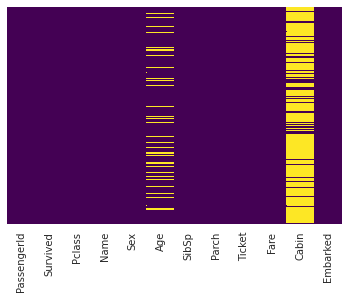

In [330]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

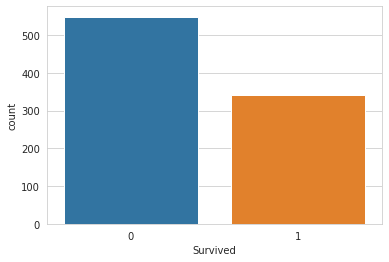

In [331]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

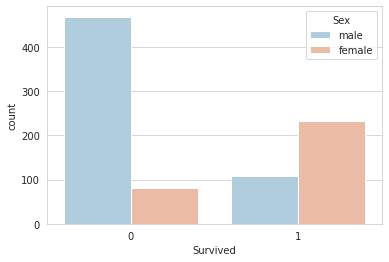

In [332]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Sex',palette='RdBu_r')

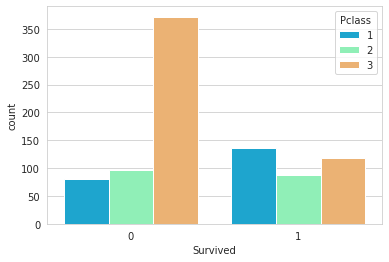

In [333]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Pclass',palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


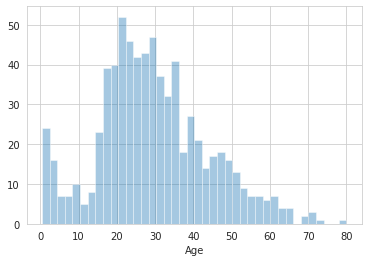

In [334]:
sns.distplot(df['Age'].dropna(),kde=False,bins=40)

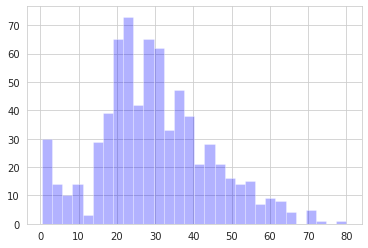

In [335]:
df['Age'].hist(bins=30,color='blue',alpha=0.3)

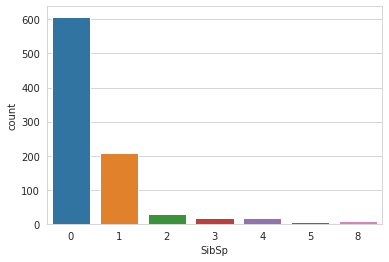

In [336]:
sns.countplot(x='SibSp',data=df)

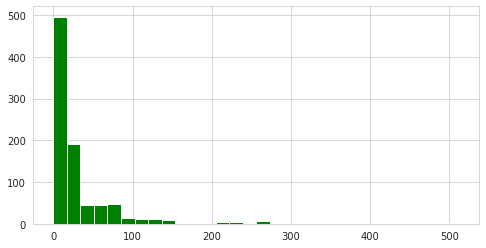

In [337]:
df['Fare'].hist(color='Green',bins=30,figsize=(8,4))

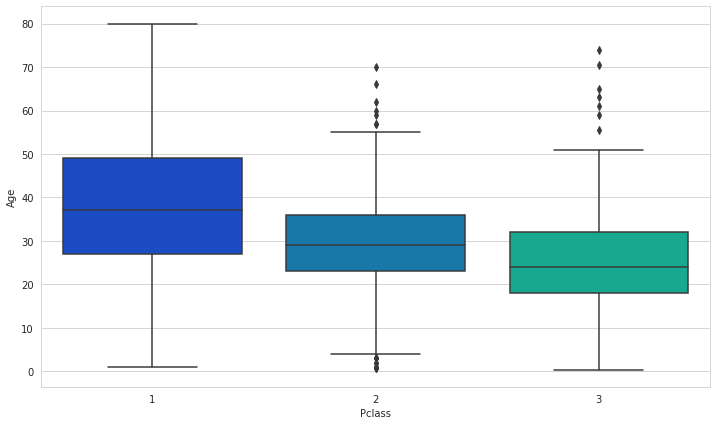

In [338]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y='Age',data=df,palette='winter')

In [339]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isna(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29

    else:
      return 24
  else:
    return Age

In [340]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

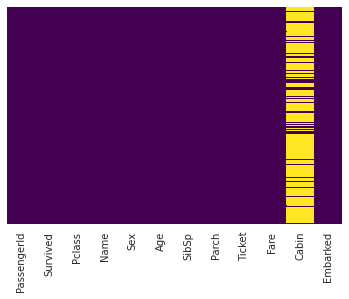

In [341]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

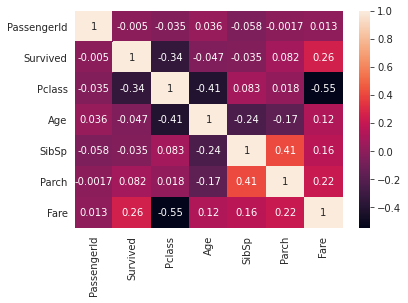

In [342]:
sns.heatmap(df.corr(),annot=True)

In [343]:
df.drop('Cabin',axis=1,inplace=True)

In [344]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


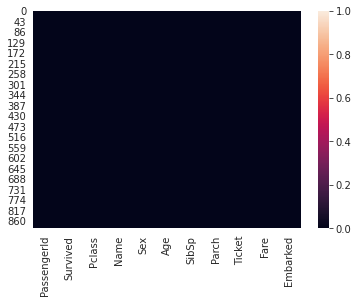

In [345]:
sns.heatmap(df.isna())

In [346]:
 df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [348]:
pd.get_dummies(df['Embarked'],drop_first=True).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [349]:
sex=pd.get_dummies(df['Sex'])
embar=pd.get_dummies(df['Embarked'],drop_first=True)

In [350]:
df.drop(['Ticket','Sex','Embarked','Name'],axis=1,inplace=True)

In [351]:
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [352]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [353]:
df1=pd.concat([df,sex,embar],axis=1)

In [354]:
df1.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1
5,6,0,3,24.0,0,0,8.4583,0,1,1,0
6,7,0,1,54.0,0,0,51.8625,0,1,0,1
7,8,0,3,2.0,3,1,21.0750,0,1,0,1
8,9,1,3,27.0,0,2,11.1333,1,0,0,1
9,10,1,2,14.0,1,0,30.0708,1,0,0,0


In [355]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
Q              0
S              0
dtype: int64

In [356]:
y=df['Survived'].values
x=df.drop(['Survived'],axis=1).values

In [357]:
x

array([[  1.    ,   3.    ,  22.    ,   1.    ,   0.    ,   7.25  ],
       [  2.    ,   1.    ,  38.    ,   1.    ,   0.    ,  71.2833],
       [  3.    ,   3.    ,  26.    ,   0.    ,   0.    ,   7.925 ],
       ...,
       [889.    ,   3.    ,  24.    ,   1.    ,   2.    ,  23.45  ],
       [890.    ,   1.    ,  26.    ,   0.    ,   0.    ,  30.    ],
       [891.    ,   3.    ,  32.    ,   0.    ,   0.    ,   7.75  ]])

In [370]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [371]:
ytest

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0])

In [395]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()


In [396]:
logreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [397]:
ypred=logreg.predict(xtest)

In [398]:
from sklearn.metrics import classification_report as cr ,confusion_matrix as cm

In [399]:
print(cr(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       153
           1       0.68      0.46      0.55       115

    accuracy                           0.68       268
   macro avg       0.68      0.65      0.65       268
weighted avg       0.68      0.68      0.66       268



In [400]:
print(cm(ytest,ypred))

[[128  25]
 [ 62  53]]
